### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 11</span>


In quesata esercitazione si è lavorato con una rete neurale per affrontare un problema di regressione su dati rumorosi. E' stata un prima prova per iniziare a capire la complessità delle reti neurali, la cui efficacia dipende dalla strtuttura: numero di layer, numero di neuroni e funzioni di attivazione. Per ottenere delle buone predizioni, però, non è succifiente occuparsi della struttura, bisogna anche suddividere in modo corretto il dataset tra dati di train e dati di test, e scegliere un numero adeguato di epoche per non incorrere in overfit. 

### Il problema della predizione

Si consideri un processo probabilistico che genera dati etichettati $(x,y)$, campionandoli dall'equazione $y_i= f(x_i) + \eta_i$, dove $f(x_i)$ è una funzione fissata (ma possibilmente sconosciuta) e $\eta_i$ è un rumore gaussiano scorrelato, tale che $\langle \eta_i \rangle=0 $ e $\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma$. Ci si riferisce a $f(x_i)$ come le caratteristiche vere usate per generare i dati. Per fare predizioni, si considera una NN che dipende dai suoi parametri, pesi e bias. Le funzioni modellizzabili dalla NN rappresentano la classe di modelli utilizzabile per fare predizioni. Per conoscere i parametri della rete, si allenano i modelli un data set di training e se ne testa l'efficacia su un data set di test, poichè lo scopo del machine learning è fare previsioni su nuovi dati. Per valutare la performance dell'algoritmo, si confronta il risultato della predizione con il valore vero, ad esempio con lo scarto quadratico medio del test set $$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

### Esercizio 11.1

Partendo dal caso più semplice, si consideri
$$
f(x)=2x+1
$$

Si definiscono i parametri da predirre con la regressione della NN

In [20]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect


Si genera un set di dati di input che deviano dal risultato esatto a causa di un rumore randomico:

In [134]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort() #ordino per unire meglio i punti nel grafico
y_target = m * x_valid + b # ideal (target) linear function

#sigma = 0.0 # noise standard deviation, for the moment it is absent
sigma = 0.3
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

Plot dei dati generati a confronto con i valori veri:

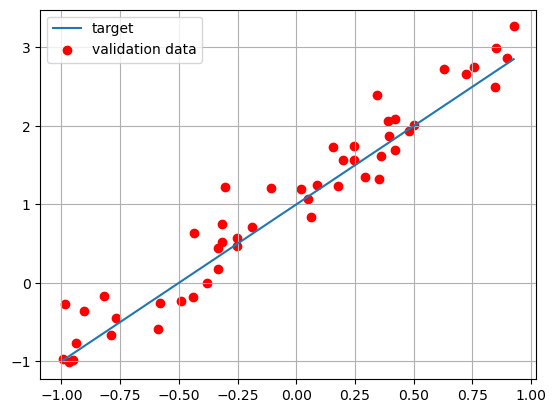

In [137]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()


Si costrusce la rete neurale usando un singolo neurone, sufficiente per questo esercizio. 

In [140]:
# compose the NN model
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

#import tensorflow.keras as keras
print(keras.__version__)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects

model = keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

#model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2.18.1
3.6.0


In [142]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)


Si allena poi il modello con il training data set che l'ottimizzatore, in questo caso l'sgd, usa per trovare i pesi migliori che minimizzino l'errore quadratico medio. 

In [145]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7849 - mse: 4.7849 - val_loss: 3.5069 - val_mse: 3.5069
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5228 - mse: 3.5228 - val_loss: 2.7171 - val_mse: 2.7171
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9550 - mse: 2.9550 - val_loss: 2.1414 - val_mse: 2.1414
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.9991 - mse: 1.9991 - val_loss: 1.7009 - val_mse: 1.7009
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6046 - mse: 1.6046 - val_loss: 1.3651 - val_mse: 1.3651
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3007 - mse: 1.3007 - val_loss: 1.1052 - val_mse: 1.1052
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1392 - mse: 1.1392 - val_loss: 0.8995 - val_mse: 0.8995
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9252 - mse: 0.9252 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 9/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7061 - ms

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.
Guardando i pesi e i bias, sapendo che si tratta rispettivamente del coefficiente angolare e dell'interecetta, si può capire se il fit è stato compiuto con successo

In [148]:
# return weights and biases
model.get_weights()

[array([[1.9876934]], dtype=float32), array([0.9667679], dtype=float32)]

In [150]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1004 - mse: 0.1004 

Test loss: 0.10019863396883011
Test accuracy: 0.10019863396883011


In [152]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mse: 0.0010        

Test loss: 0.0011098651448264718
Test accuracy: 0.0011098651448264718


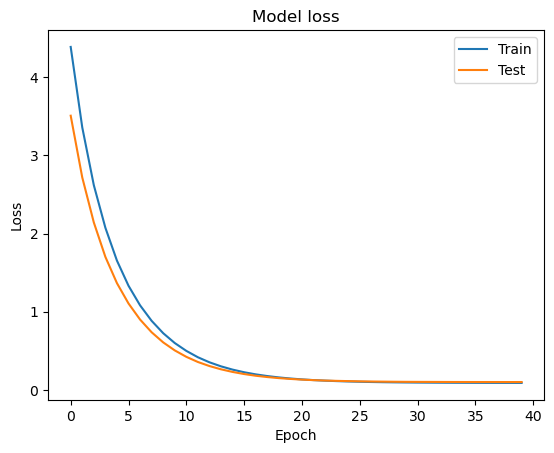

In [154]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Il fatto che la loss diminuisca monotonamente è indice del buon funzionamento della rete. La situazione ideale sarebbe avere una loss di test minore di quella di train, poichè significherebbe che i dati di test predetti (quindi i dati nuovi), sono più vicini ai valori attesi rispetto al dataset di train, ma anche questo risultato è accettabile. 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


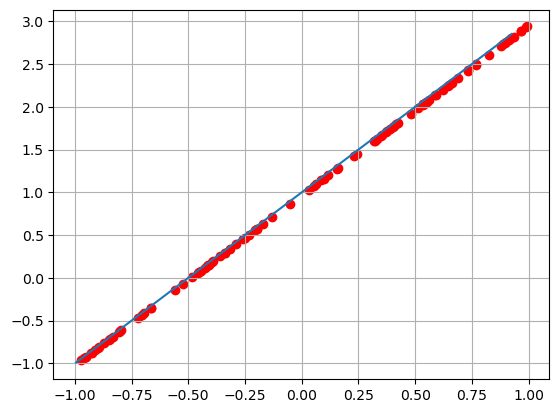

In [157]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Si può affermare che i dati infine predetti sono sufficientemente coerenti con quelli attesi. Aumentando ulteriormente il numero di epoche si va incontro a overfitting, più chiaramente visbile nel grafico della loss, data la discrepanza tra loss di train e di test. 